In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:


stock_and_econ_cleaned = pd.read_excel('C:/Users/amita/team_lambda/Data/stock_and_econ_cleaned.xlsx', sheet_name='Sheet1')




In [5]:
# Replace missing numeric values with column mean
stock_and_econ_cleaned = stock_and_econ_cleaned.apply(
    lambda col: col.fillna(col.mean()) if col.dtypes != 'object' else col
)

In [6]:
# Convert logical columns to numeric
logical_columns = [
    "Sector_Electrical Utilities & IPPs",
    "Sector_Food & Tobacco",
    "Sector_Healthcare Equipment & Supplies",
    "Sector_Hotels & Entertainment Services",
    "Sector_Insurance",
    "Sector_Investment Banking & Investment Services",
    "Sector_Machinery, Equipment & Components",
    "Sector_Media & Publishing",
    "Sector_Oil & Gas",
    "Sector_Other",
    "Sector_Pharmaceuticals",
    "Sector_Professional & Commercial Services",
    "Sector_Residential & Commercial REIT",
    "Sector_Semiconductors & Semiconductor Equipment",
    "Sector_Software & IT Services"
]

In [7]:
stock_and_econ_cleaned[logical_columns] = stock_and_econ_cleaned[logical_columns].astype(int)


In [8]:
# Check for missing values
print("Number of missing values:", stock_and_econ_cleaned.isnull().sum().sum())

# Add Quarter_Num, Quarter_sin, and Quarter_cos
quarter_mapping = {"Q1": 1, "Q2": 2, "Q3": 3, "Q4": 4}
stock_and_econ_cleaned['Quarter_Num'] = stock_and_econ_cleaned['Quarter'].map(quarter_mapping)
stock_and_econ_cleaned['Quarter_sin'] = np.sin(2 * np.pi * stock_and_econ_cleaned['Quarter_Num'] / 4)
stock_and_econ_cleaned['Quarter_cos'] = np.cos(2 * np.pi * stock_and_econ_cleaned['Quarter_Num'] / 4)


Number of missing values: 0


In [9]:
# Map PE_Category to numeric values
pe_category_mapping = {"Low": 0, "Good": 1, "High": 2, "Craziness": 3}
stock_and_econ_cleaned['PE_Category_Num'] = stock_and_econ_cleaned['PE_Category'].map(pe_category_mapping).fillna(0).astype(int)


In [10]:
# Save the cleaned dataset to an Excel file
stock_and_econ_cleaned.to_excel("stock_and_econ_cleaned.xlsx", index=False)
print("Cleaned dataset saved to stock_and_econ_cleaned.xlsx")


Cleaned dataset saved to stock_and_econ_cleaned.xlsx


In [11]:
# PCA
pca_data = stock_and_econ_cleaned.select_dtypes(include=[np.number]).drop(columns=['Label'])
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)


In [12]:
pca = PCA()
pca_result = pca.fit(pca_data_scaled)


In [13]:
# PCA summary
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))


Explained variance ratio: [0.08466182 0.06894116 0.05295694 0.04982714 0.04884688 0.04394418
 0.03904008 0.03580021 0.03366692 0.03087683 0.02952803 0.02915019
 0.02859741 0.02857135 0.02837237 0.02807949 0.02804676 0.02725684
 0.02700426 0.02668777 0.02577472 0.0252798  0.02396859 0.0220551
 0.02079084 0.01779133 0.01583787 0.01526933 0.01451646 0.01126514
 0.00923933 0.00883836 0.00713391 0.00647776 0.00279074 0.00219298
 0.00092111]
Cumulative explained variance: [0.08466182 0.15360298 0.20655992 0.25638706 0.30523394 0.34917812
 0.3882182  0.42401841 0.45768533 0.48856215 0.51809019 0.54724038
 0.57583779 0.60440914 0.63278151 0.660861   0.68890776 0.7161646
 0.74316886 0.76985663 0.79563135 0.82091115 0.84487975 0.86693484
 0.88772568 0.90551701 0.92135488 0.93662421 0.95114067 0.96240581
 0.97164514 0.9804835  0.98761741 0.99409517 0.99688591 0.99907889
 1.        ]


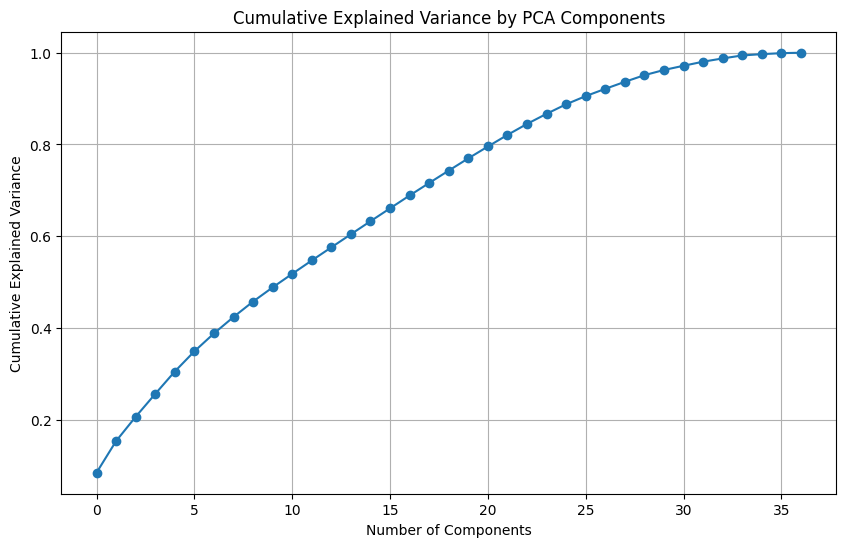

In [14]:
# Plot PCA explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [16]:
# Train-test split
X = stock_and_econ_cleaned.drop(columns=['Label'])
y = stock_and_econ_cleaned['Label'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)



In [17]:
# Logistic Regression with Cross-Validation
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-validated AUC scores:", cv_scores)
print("Mean AUC score:", np.mean(cv_scores))


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1222, in fit
    X, y = validate_data(
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Q2'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1222, in fit
    X, y = validate_data(
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Q4'
